In [ ]:
A Recurrent Neural Network (RNN) is a type of neural network designed to process sequential
data by using connections that allow information to persist across steps, making it effective
for tasks like time series analysis and natural language processing.

In [ ]:
Suppose you want to predict the next word in the sentence, "The cat is on the ___."

The RNN takes the sequence "The cat is on the" as input, processes each word one at a time, 
and remembers context from each previous word.
Based on this context, the RNN generates probabilities 
    for the next word, such as "floor," "table," or "sofa."
The word with the highest probability is chosen as the prediction.

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text for training
text = "The cat is on the floor. The cat is on the table. The dog is in the garden."

# Step 1: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Convert text to sequences of numbers
input_sequences = []
for line in text.split(". "):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
print(input_sequences)
# Pad sequences to ensure uniform length
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Split into input (X) and output (y)
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = np.array(y)
print(X,y)
# Step 2: Build the RNN model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(SimpleRNN(50))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 3: Train the model
model.fit(X, y, epochs=100, verbose=1)

# Step 4: Predict the next word
def predict_next_word(seed_text, model, tokenizer, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted_probs)
    predicted_word = tokenizer.index_word[predicted_word_index]
    return predicted_word

# Test the prediction
seed_text = "The cat is on the"
next_word = predict_next_word(seed_text, model, tokenizer, max_sequence_len)
print(f"Next word prediction: {next_word}")


[[1, 3], [1, 3, 2], [1, 3, 2, 4], [1, 3, 2, 4, 1], [1, 3, 2, 4, 1, 5], [1, 3], [1, 3, 2], [1, 3, 2, 4], [1, 3, 2, 4, 1], [1, 3, 2, 4, 1, 6], [1, 7], [1, 7, 2], [1, 7, 2, 8], [1, 7, 2, 8, 1], [1, 7, 2, 8, 1, 9]]
[[0 0 0 0 1]
 [0 0 0 1 3]
 [0 0 1 3 2]
 [0 1 3 2 4]
 [1 3 2 4 1]
 [0 0 0 0 1]
 [0 0 0 1 3]
 [0 0 1 3 2]
 [0 1 3 2 4]
 [1 3 2 4 1]
 [0 0 0 0 1]
 [0 0 0 1 7]
 [0 0 1 7 2]
 [0 1 7 2 8]
 [1 7 2 8 1]] [3 2 4 1 5 3 2 4 1 6 7 2 8 1 9]
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1333 - loss: 2.3169
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2667 - loss: 2.2988
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3333 - loss: 2.2812
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4000 - loss: 2.2637
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4000 - loss: 2.2461
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4000 - loss: 2.2283
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accurac

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
Epoch 1/200


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3802
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345
Epoch 3/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0222

C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037
Epoch 13/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036
Epoch 14/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031
Epoch 15/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028
Epoch 16/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 
Epoch 17/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026
Epoch 18/

C:\Users\kkpr2\AppData\Local\Temp\ipykernel_6256\1629586166.py:62: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(actual_values.index[-1], periods=13, freq='M')[1:], predicted_values, label='Predicted Values', color='red')


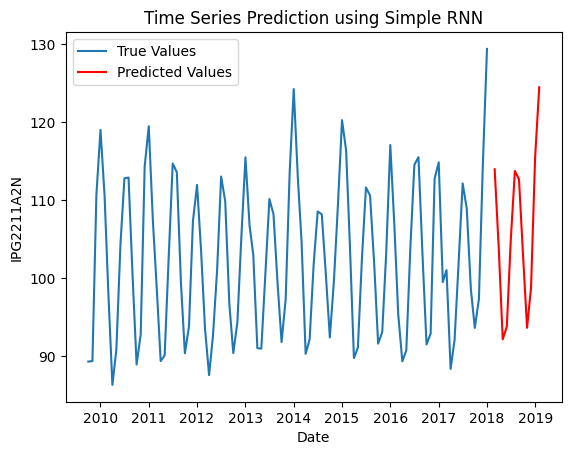

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Step 1: Load Data
data = pd.read_csv('time.csv', parse_dates=['DATE'], index_col='DATE')

# Display the first few rows of the data
print(data.head())

# Step 2: Preprocess Data
# We will use only the 'IPG2211A2N' column for prediction
data = data[['IPG2211A2N']]

# Normalize the data (scaling the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Create Sequences for the RNN
sequence_length = 50  # Number of previous time steps to use for prediction
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=32)

# Step 4: Build the Simple RNN Model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer (predict the next value)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
model.fit(generator, epochs=200, verbose=1)

# Step 6: Predict Future Values
# We can now predict future values. For that, we take the last `sequence_length` data points and predict forward.

# Prepare the initial sequence (last `sequence_length` data points)
input_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)

# Predict the next 12 months (for example)
predicted_values = []
for _ in range(12):
    predicted = model.predict(input_sequence)
    predicted_values.append(predicted[0][0])
    
    # Update the input sequence for the next prediction
    input_sequence = np.append(input_sequence[:, 1:, :], predicted.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted values to the original scale
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

# Step 7: Plot the Results
# Get the actual values to plot
actual_values = data.tail(100)  # Get the last 100 actual values

# Plot the true values and the predicted future values
plt.plot(actual_values.index, actual_values, label='True Values')
plt.plot(pd.date_range(actual_values.index[-1], periods=13, freq='M')[1:], predicted_values, label='Predicted Values', color='red')
plt.xlabel("Date")
plt.ylabel("IPG2211A2N")
plt.legend()
plt.title("Time Series Prediction using Simple RNN")
plt.show()


            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
Epoch 1/200


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4270
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1522 
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0352 
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 
Epoch 13/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 
Epoch 14/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090
Epoch 15/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075
Epoch 16

C:\Users\kkpr2\AppData\Local\Temp\ipykernel_5600\3122199727.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='M')[1:]


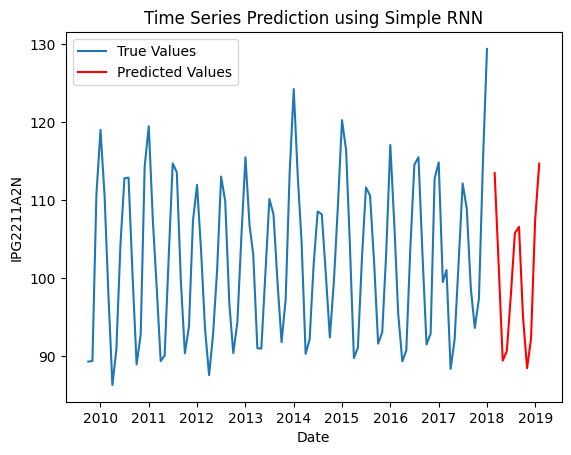

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Step 1: Load Data
data = pd.read_csv('time.csv', parse_dates=['DATE'], index_col='DATE')

# Display the first few rows of the data
print(data.head())

# Step 2: Preprocess Data
data = data[['IPG2211A2N']]

# Normalize the data (scaling the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Create Sequences for the RNN
sequence_length = 50  # Number of previous time steps to use for prediction
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=32)

# Step 4: Build the Simple RNN Model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer (predict the next value)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
model.fit(generator, epochs=200, verbose=1)

# Step 6: Predict Future Values
input_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)

# Define the number of future steps (months) to predict
future_steps = 12
predicted_values = []

for _ in range(future_steps):
    predicted = model.predict(input_sequence)
    predicted_values.append(predicted[0][0])
    
    # Update the input sequence for the next prediction
    input_sequence = np.append(input_sequence[:, 1:, :], predicted.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted values to the original scale
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))
print(predicted_values)
# Step 7: Generate Dates for Predictions
# Get the last date in the dataset
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='M')[1:]

# Print the future dates with their corresponding predicted values
for date, value in zip(future_dates, predicted_values):
    print(f"{date.date()}: {value[0]:.2f}")

# Step 8: Plot the Results
# Get the actual values to plot
actual_values = data.tail(100)  # Get the last 100 actual values

# Plot the true values and the predicted future values
plt.plot(actual_values.index, actual_values, label='True Values')
plt.plot(future_dates, predicted_values, label='Predicted Values', color='red')
plt.xlabel("Date")
plt.ylabel("IPG2211A2N")
plt.legend()
plt.title("Time Series Prediction using Simple RNN")
plt.show()
